Project 1

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from proj1_helpers import *
from implementations import *
from plots import *
#TODO
# Cleaning data.
# Cross validation in order to reduce overfitting assuming that the data sample are iid.
# Polynomial + ridge regression to find optimal complexity.

In [3]:
# load training dataset
yb, input_data, ids = load_csv_data('train.csv')

# load test dataset
yb_te, te_data, ids_te = load_csv_data('../../test.csv')

Least_squares

In [9]:
weights, loss=least_squares(yb,input_data)
y_pred = predict_labels(weights, te_data)
create_csv_submission(ids_te, y_pred, 'prediction')

Ridge regression

degree=1, lambda=0.000, Training RMSE=0.824, Testing RMSE=1.395
degree=1, lambda=0.000, Training RMSE=0.824, Testing RMSE=1.395
degree=1, lambda=0.001, Training RMSE=0.824, Testing RMSE=1.394
degree=1, lambda=0.016, Training RMSE=0.825, Testing RMSE=1.389
degree=1, lambda=0.193, Training RMSE=0.835, Testing RMSE=1.380
degree=1, lambda=2.276, Training RMSE=0.843, Testing RMSE=1.377
degree=1, lambda=26.827, Training RMSE=0.846, Testing RMSE=1.372
degree=1, lambda=316.228, Training RMSE=0.859, Testing RMSE=1.351
degree=1, lambda=3727.594, Training RMSE=0.892, Testing RMSE=1.326
degree=1, lambda=43939.706, Training RMSE=0.913, Testing RMSE=1.300
degree=1, lambda=517947.468, Training RMSE=0.933, Testing RMSE=1.252
degree=1, lambda=6105402.297, Training RMSE=0.966, Testing RMSE=1.093
degree=1, lambda=71968567.300, Training RMSE=0.995, Testing RMSE=1.011
degree=1, lambda=848342898.244, Training RMSE=1.000, Testing RMSE=1.001
degree=1, lambda=10000000000.000, Training RMSE=1.000, Testing RMSE=

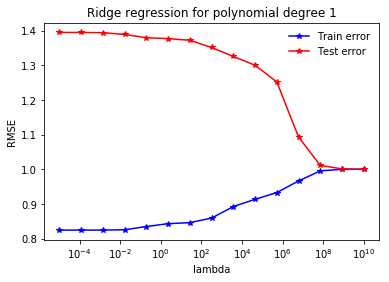

In [38]:
lambdas = np.logspace(-5, 10, 15)    
#x_tr_poly=build_poly(input_data,degree)                  #build poly base for both training and test x data
#x_poly=build_poly(x,degree)
#x_te_poly=build_poly(te_data,degree)    

rmse_tr = []
rmse_te = []
for ind, lambda_ in enumerate(lambdas):
    weights_train,loss_mse_train=ridge_regression(yb,input_data,lambda_)     # ridge regression for training data
    #print(y_test.shape)
    #loss_mse_train=compute_mse_regularization(y_train,x_train_poly,weights_train,lambda_) #find mse for training data
    #print((2*loss_mse_train)**(1/2))
    loss_mse_test=compute_mse(yb_te,te_data,weights_train)    #mse for test data using ls weight of training data
    rmse_tr.append(np.power(2*loss_mse_train,(1/2)))
    rmse_te.append(np.power(2*loss_mse_test,(1/2)))
    print("degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
        d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
# Plot the obtained results
plot_train_test(rmse_tr, rmse_te, lambdas, degree)